# <center>Day 3</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
import warnings

warnings.filterwarnings('ignore')

In [2]:
print(listdir('../data/'))

['Admission_Predict.csv', 'AirPassengers.csv', 'BlackFriday.csv', 'CCCHURN-Bank Churn.doc', 'CCCHURN.csv', 'cs-training.csv', 'data1.csv', 'data2.csv', 'LoR-Bank-full-TDsubscription.xlsx', 'Melbourne_housing_FULL.csv', 'train04.csv']


In [3]:
df = pd.read_csv('../data/Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN


Before even starting think about the **Objective** of the EDA/modelling.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom          26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13760 non-null object
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Latitude         26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34857 non-null object
Propertycount    34854 non-null float64
ParkingArea      34857 non-null object
Price            27247 non-null float64
dtypes: float64(11), in

### Since our dependant variable (price) is having missing values, we will drop those values and continue.

In [5]:
df = df[df['Price']>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 22 columns):
Suburb           27247 non-null object
Address          27247 non-null object
Rooms            27247 non-null int64
Type             27247 non-null object
Method           27247 non-null object
SellerG          27247 non-null object
Date             27247 non-null object
Distance         27246 non-null float64
Postcode         27246 non-null float64
Bedroom          20806 non-null float64
Bathroom         20800 non-null float64
Car              20423 non-null float64
Landsize         17982 non-null float64
BuildingArea     10670 non-null object
YearBuilt        12084 non-null float64
CouncilArea      27244 non-null object
Latitude         20993 non-null float64
Longtitude       20993 non-null float64
Regionname       27247 non-null object
Propertycount    27244 non-null float64
ParkingArea      27247 non-null object
Price            27247 non-null float64
dtypes: float64(11), in

### Now again find the missing values

In [6]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16577
YearBuilt        15163
CouncilArea          3
Latitude          6254
Longtitude        6254
Regionname           0
Propertycount        3
ParkingArea          0
Price                0
dtype: int64

We will focus more on the dependant variable now and then move on to the independents.

2.5889693410528607
Accepted range is -1 to +1
After transformation
0.33590637843423793


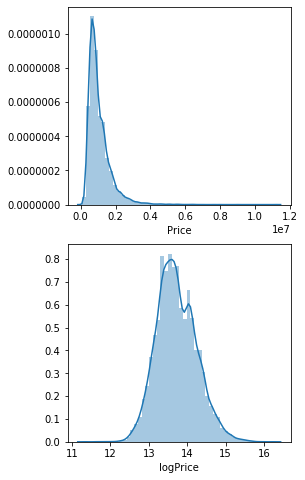

In [7]:
print(df['Price'].skew())
print("Accepted range is -1 to +1")
print("After transformation")
df['logPrice'] = df['Price'].apply(lambda x: np.log(x))
print(df['logPrice'].skew())

fig,ax = plt.subplots(2,1,figsize=(4,8))

sns.distplot(df['Price'],ax=ax[0])
sns.distplot(df['logPrice'],ax=ax[1])
plt.show()

### QQ plot

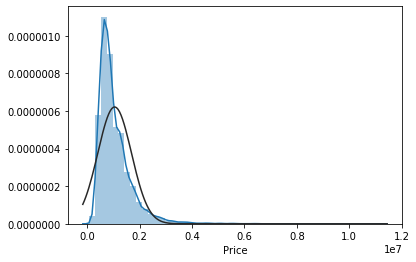

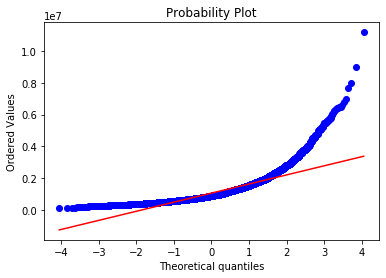

In [8]:
from scipy import stats
from scipy.stats import norm

mu, sigma = norm.fit(df['Price'])
sns.distplot(df['Price'],fit=norm)

fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)
plt.show()

#### After log transformation

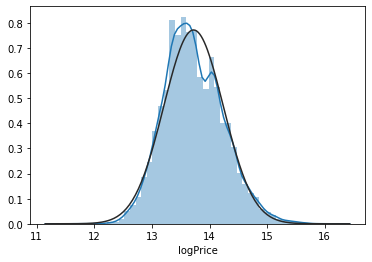

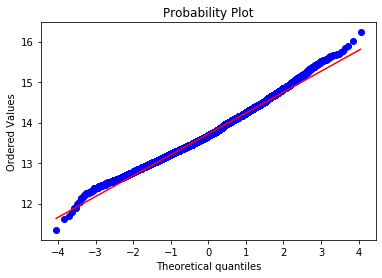

In [9]:
from scipy import stats
from scipy.stats import norm

mu, sigma = norm.fit(df['logPrice'])
sns.distplot(df['logPrice'],fit=norm)

fig = plt.figure()
res = stats.probplot(df['logPrice'], plot=plt)
plt.show()

In [10]:
df.select_dtypes(include="integer").columns

Index(['Rooms'], dtype='object')

In [11]:
df.select_dtypes(include="float").columns

Index(['Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'YearBuilt', 'Latitude', 'Longtitude', 'Propertycount', 'Price',
       'logPrice'],
      dtype='object')

In [12]:
df['Distance'].describe()

count    27246.000000
mean        11.280276
std          6.787469
min          0.000000
25%          6.400000
50%         10.500000
75%         14.000000
max         48.100000
Name: Distance, dtype: float64

We are having only one missing value, we will replace this with mean.

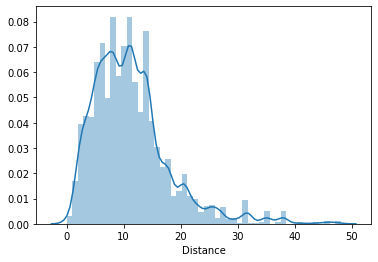

In [13]:
sns.distplot(df['Distance'].dropna())

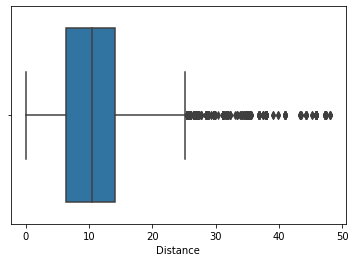

In [14]:
sns.boxplot(df['Distance'].dropna())

Outlier treatment

- We use box plots in features which are not truly continuous.
- So in this case we will use `z-score` method.


In [15]:
from scipy import stats
df['Distance'] = df['Distance'].fillna(df['Distance'].mean())
df = df[np.abs(stats.zscore(df['Distance'])) < 3]

In [16]:
df['Distance'].describe()

count    26619.000000
mean        10.697779
std          5.653093
min          0.000000
25%          6.400000
50%         10.300000
75%         13.900000
max         31.600000
Name: Distance, dtype: float64

#### Rooms

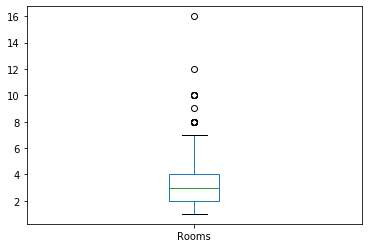

In [17]:
df['Rooms'].plot.box()
plt.show()

Using IQR method for cleaning

In [18]:
rooms = df['Rooms']
q3 = rooms.quantile(q=.75)
q1 = rooms.quantile(q=.25)
iqr = q3 - q1
print("IQR",iqr)
print("Lower",q1 - iqr*1.5)
print("Upper",q3 + iqr*1.5)

IQR 2.0
Lower -1.0
Upper 7.0


In [19]:
df = df[~((df['Rooms'] < (q1 - iqr*1.5) ) | (df['Rooms'] > (q3 + iqr*1.5) ))] 

In [20]:
df['Rooms'].describe()

count    26598.000000
mean         2.977292
std          0.939423
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Rooms, dtype: float64

In [21]:
df.isna().sum().sort_values(ascending=False)

BuildingArea     16245
YearBuilt        14842
Landsize          9040
Car               6711
Bathroom          6345
Bedroom           6339
Longtitude        6159
Latitude          6159
Propertycount        3
CouncilArea          3
Postcode             1
SellerG              0
Address              0
Rooms                0
Type                 0
Method               0
logPrice             0
Date                 0
Distance             0
Price                0
Regionname           0
ParkingArea          0
Suburb               0
dtype: int64

#### Postcode

In [22]:
post_mode = df['Postcode'].mode()[0]
post_mode

3073.0

In [23]:
df['Postcode'] = df['Postcode'].fillna(post_mode)

In [24]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom           6339
Bathroom          6345
Car               6711
Landsize          9040
BuildingArea     16245
YearBuilt        14842
CouncilArea          3
Latitude          6159
Longtitude        6159
Regionname           0
Propertycount        3
ParkingArea          0
Price                0
logPrice             0
dtype: int64

#### Bedroom

#### Outlier treatment

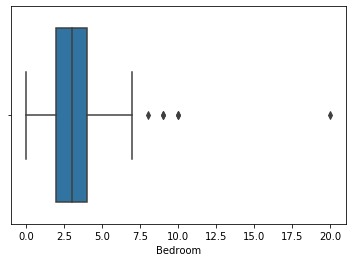

In [25]:
sns.boxplot(df['Bedroom'].dropna())
plt.show()

In [26]:
rooms = df['Bedroom']
q3 = rooms.quantile(q=.75)
q1 = rooms.quantile(q=.25)
iqr = q3 - q1
low = q1 - iqr*1.5
up = q3 + iqr*1.5
print("IQR",iqr)
print("Lower",low)
print("Upper",up)

df = df[~((df['Bedroom'] < low) | (df['Bedroom'] > up))]

IQR 2.0
Lower -1.0
Upper 7.0


In [28]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom           6339
Bathroom          6345
Car               6711
Landsize          9040
BuildingArea     16241
YearBuilt        14838
CouncilArea          3
Latitude          6159
Longtitude        6159
Regionname           0
Propertycount        3
ParkingArea          0
Price                0
logPrice             0
dtype: int64

#### Landsize

In [29]:
df['Landsize'].describe()

count     17552.000000
mean        551.892263
std        3428.625666
min           0.000000
25%         214.000000
50%         499.500000
75%         659.000000
max      433014.000000
Name: Landsize, dtype: float64

#### Remove ouliers

We will use position based approach and not mean based apporach

In [40]:
col_name = "Landsize"
rooms = df[col_name]
q3 = rooms.quantile(q=.75)
q1 = rooms.quantile(q=.25)
iqr = q3 - q1
low = q1 - iqr*1.5
up = q3 + iqr*1.5
print("IQR",iqr)
print("Lower",low)
print("Upper",up)

df = df[~((df[col_name] < low) | (df[col_name] > up))]
df[col_name].describe()

IQR 423.0
Lower -400.5
Upper 1291.5


count    25947.000000
mean       463.671291
std        271.428894
min          0.000000
25%        234.000000
50%        527.000000
75%        657.000000
max       1291.000000
Name: Landsize, dtype: float64

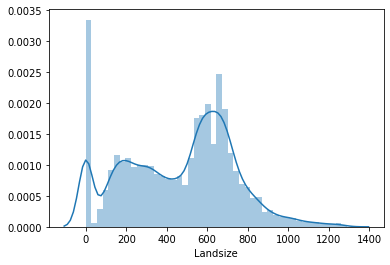

In [41]:
ax = sns.distplot(df['Landsize'])

#### Filling with distribution based imputation.

In [43]:
df['Landsize'] = df['Landsize'].fillna(method="ffill")
df['Landsize'].describe()

count    25947.000000
mean       463.671291
std        271.428894
min          0.000000
25%        234.000000
50%        527.000000
75%        657.000000
max       1291.000000
Name: Landsize, dtype: float64

## EDA 

In [ ]:
sns.distplot()

### Univariate

In [45]:
df.select_dtypes(include="object").columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date',
       'BuildingArea', 'CouncilArea', 'Regionname', 'ParkingArea'],
      dtype='object')

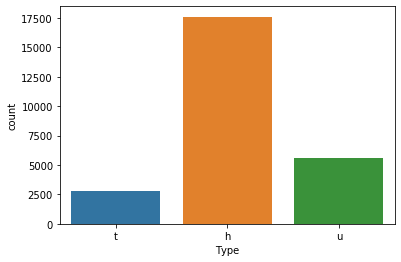

In [48]:
ax =sns.countplot(df['Type'])

## Bivariate

Compare with respect to a target variable.

#### Price and Type


> Important: Checking the mean price rather than the actual price per category.


Type
h    1.213375e+06
t    9.306458e+05
u    6.278932e+05
Name: Price, dtype: float64


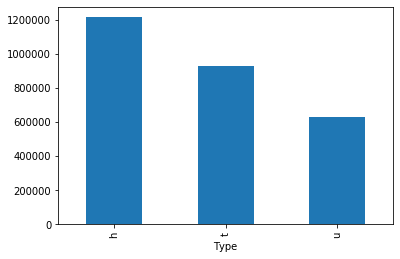

In [51]:
# sns.violinplot(data=df,x='Type',y='Price',)

print(df.groupby('Type')['Price'].agg('mean'))
df.groupby('Type')['Price'].agg('mean').plot.bar()

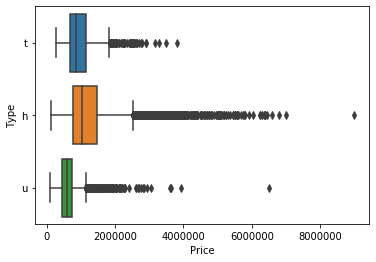

In [55]:
ax = sns.boxplot(data=df,y='Type',x='Price')

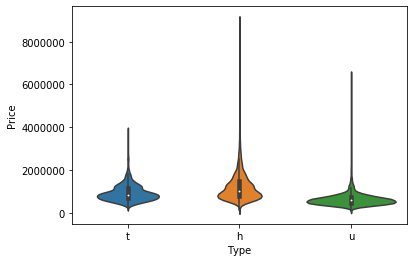

In [53]:
ax = sns.violinplot(data=df,x='Type',y='Price')

In [59]:
desc

count    2.594700e+04
mean     1.057619e+06
std      6.278992e+05
min      8.500000e+04
25%      6.460000e+05
50%      8.850000e+05
75%      1.300000e+06
max      9.000000e+06
Name: Price, dtype: float64

In [60]:
desc = df['Price'].describe()

print(desc['25%'])
print(desc['50%'])
print(desc['75%'])

646000.0
885000.0
1300000.0


In [62]:
def price_cat(pr):
    if pr < desc['25%']:
        return 1
    elif pr < desc['50%']:
        return 2
    elif pr < desc['75%']:
        return 3
    else:
        return 4
    
df['price_cat'] = df['Price'].apply(price_cat)
df['price_cat'].value_counts()

4    6616
2    6487
1    6481
3    6363
Name: price_cat, dtype: int64

In [64]:
df.groupby('price_cat')['Price'].agg(['min','max'])

,min,max
price_cat,,
1,85000.0,645500.0
2,646000.0,884500.0
3,885000.0,1298000.0
4,1300000.0,9000000.0


In [65]:
df.pivot_table(values="Price",index="price_cat",aggfunc=["min","max"])

,min,max
,Price,Price
price_cat,,
1,85000.0,645500.0
2,646000.0,884500.0
3,885000.0,1298000.0
4,1300000.0,9000000.0


### Cross Tab

price_cat     1     2     3     4
Type                             
h          2401  4108  5062  6027
t           619   904   849   425
u          3461  1475   452   164

price_cat         1         2         3         4
Type                                             
h          0.136436  0.233436  0.287646  0.342482
t          0.221309  0.323203  0.303540  0.151949
u          0.623379  0.265670  0.081412  0.029539


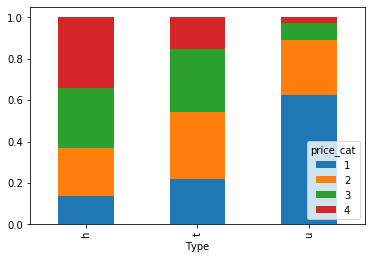

In [72]:
ct = pd.crosstab(df['Type'],df['price_cat'])
print(ct);print()
# index:0 and columns:1
ct = pd.crosstab(df['Type'],df['price_cat'],normalize='index')
print(ct)
ct.plot.bar(stacked=True)
plt.show()

- In type-U, lowest priced houses is having the maximum proportion.
- In type-H, type 3 and 4 is having the maximum proposrtion. 

#### Price and Distance

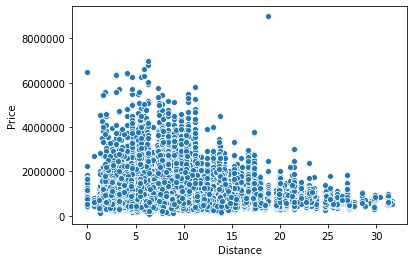

In [92]:
sns.scatterplot(data=df,x='Distance',y='Price')

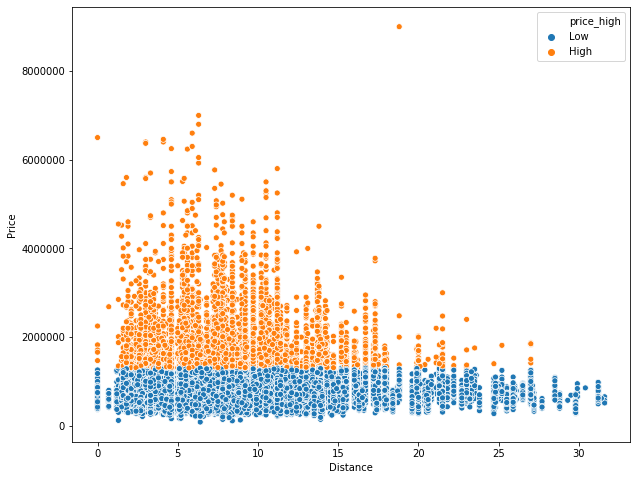

In [90]:
df['price_high'] = df['Price'].apply(lambda x: "High" if x > desc["75%"] else "Low" )

plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='Distance',y='Price',hue="price_high")
plt.show()

                mean
            Distance
price_cat           
1          11.661731
2          12.009527
3          10.529027
4           8.821055


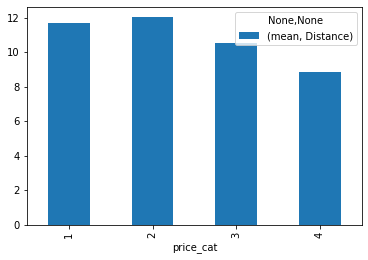

In [80]:
dist_cat = df.pivot_table(values="Distance",index="price_cat",aggfunc=["mean"])
print(dist_cat)

dist_cat.plot.bar()

The chart shows that the lowest distance is associated with highest price category. 

There is not much difference in mean distance between price categories 1 and 2.

In [94]:
def dist_cat(pr):
    if pr < desc['25%']:
        return 1
    elif pr < desc['50%']:
        return 2
    elif pr < desc['75%']:
        return 3
    else:
        return 4

desc = df['Distance'].describe()
df['dist_cat'] = df['Distance'].apply(dist_cat)
df['dist_cat'].value_counts()

2    6677
4    6651
3    6396
1    6223
Name: dist_cat, dtype: int64

price_cat     1     2     3     4
dist_cat                         
1          1590  1001  1562  2070
2          1243  1517  1647  2270
3          1490  1912  1503  1491
4          2158  2057  1651   785

price_cat         1         2         3         4
dist_cat                                         
1          0.255504  0.160855  0.251004  0.332637
2          0.186161  0.227198  0.246668  0.339973
3          0.232958  0.298937  0.234991  0.233114
4          0.324462  0.309277  0.248233  0.118027


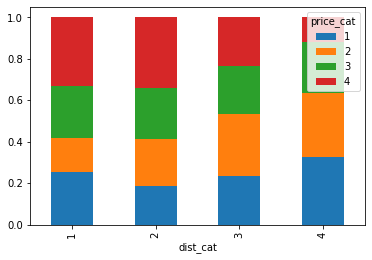

In [95]:
ct = pd.crosstab(df['dist_cat'],df['price_cat'])
print(ct);print()
# index:0 and columns:1
ct = pd.crosstab(df['dist_cat'],df['price_cat'],normalize='index')
print(ct)
ct.plot.bar(stacked=True)
plt.show()

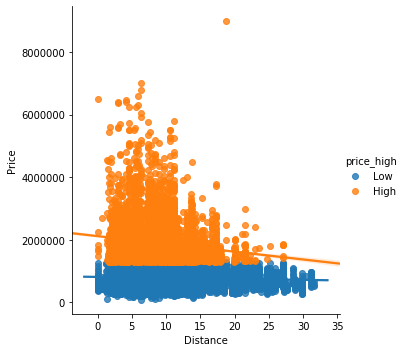

In [96]:
sns.lmplot(x="Distance",y="Price",hue="price_high",data=df)
plt.show()

From the regression line, it is visible that ; Low priced houses, price is less influenced by distance (flat line) whereas for high price the value decreases when the distance increases.

### Price and landsize

In [97]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude', 'Longtitude',
       'Regionname', 'Propertycount', 'ParkingArea', 'Price', 'logPrice',
       'price_cat', 'price_high', 'dist_cat'],
      dtype='object')

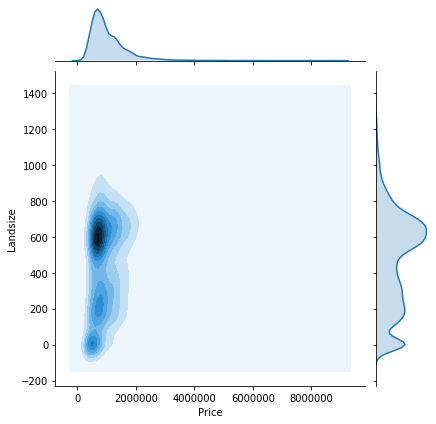

In [102]:
sns.jointplot(x='Price',y="Landsize",data=df,kind="kde")
plt.show()

### Price and Parking Area

In [105]:
df[['ParkingArea']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25947 entries, 1 to 34856
Data columns (total 1 columns):
ParkingArea    25947 non-null object
dtypes: object(1)
memory usage: 1.3+ MB


Carport            4726
Detached Garage    4619
Attached Garage    4601
Indoor             4244
Parkade            3501
Underground        1935
Outdoor Stall      1537
Parking Pad         784
Name: ParkingArea, dtype: int64
Carport            0.182141
Detached Garage    0.178017
Attached Garage    0.177323
Indoor             0.163564
Parkade            0.134929
Underground        0.074575
Outdoor Stall      0.059236
Parking Pad        0.030215
Name: ParkingArea, dtype: float64


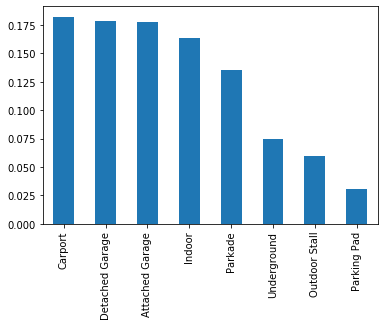

In [111]:
print(df['ParkingArea'].value_counts())
print(df['ParkingArea'].value_counts(normalize=True))
df['ParkingArea'].value_counts(normalize=True).plot.bar()

In [106]:
df.pivot_table(values="Price",index="ParkingArea",aggfunc="mean")

,Price
ParkingArea,
Attached Garage,1.057268e+06
Carport,1.064789e+06
Detached Garage,1.053595e+06
Indoor,1.040950e+06
Outdoor Stall,1.070688e+06
Parkade,1.057109e+06
Parking Pad,1.063094e+06
Underground,1.075434e+06


Mean is more or less same across various parking areas.

In [115]:
park_cat = pd.crosstab(df["ParkingArea"],df["price_cat"],normalize=0)
print(park_cat)

park_cat.

price_cat               1         2         3         4
ParkingArea                                            
Attached Garage  0.250598  0.249728  0.245599  0.254075
Carport          0.255607  0.241219  0.245662  0.257512
Detached Garage  0.254817  0.247673  0.247023  0.250487
Indoor           0.253063  0.255184  0.241989  0.249764
Outdoor Stall    0.247885  0.247235  0.239427  0.265452
Parkade          0.242217  0.255356  0.246501  0.255927
Parking Pad      0.247449  0.247449  0.248724  0.256378
Underground      0.230491  0.259948  0.247028  0.262532
